# 6-Histogram Specification
in this section our goal is to transform an image so that its histogram matches a specified histogram.
two key pionts that used to achieve our goal is how to :
1) equalize histogram

2) specify histogram
<img src="session1.png" style="width=200px;height=100px"/>


## histogram equalization
the probability of occurrence of intensity level $r_{k}$ in a digital image is approximated by:

$$p_{r}(r_{k})=\frac{r_{k}}{MN} (1)$$


where $MN$ is the total number of pixels in the image, and $n_{k}$  denotes the number of
pixels that have intensity $r_{k}$. note that, $p_{r}(r_{k})$, with
$r_{k}∈ [ 0,L-1 ]$ is commonly referred to as a normalized image histogram.
The discrete form of the transformation is:

$$S_{k}=T(r_{k}) = \textrm{(L-1)} \sum \limits _{j=0} ^{k} p_{r}(r_{j})       $$

where, as before, $L$ is the number of possible intensity levels in the image. Thus, a processed (output) image is obtained by using above Equation.
to map each pixel in the input image with intensity $r_{k}$ into a corresponding pixel with
level $s_{k}$ in the output image, This is called a histogram equalization or histogram
linearization transformation. 

description of functions:
* `histogram_equalizer`: get the image and equlize it's histogram according to above equations

* `hist_calculator`: get the image and save it's histogram as an array 

* `com_calculator`: get histogram of an image and caclulate it's cumulative distribution function 

*  `apply changes`: get inital and final histogram and trasnform it.



In [2]:
from matplotlib import image
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image as im

# ---------------------------------

def hist_calculator(img: np.ndarray):

    h_r: np.ndarray = cv2.calcHist([img], [0], None, [256], [0, 256])
    h_g: np.ndarray = cv2.calcHist([img], [1], None, [256], [0, 256])
    h_b: np.ndarray = cv2.calcHist([img], [2], None, [256], [0, 256])

    return h_r, h_g, h_b


# -------------------------------
def com_calculator(hr, hg, hb, size):

    commulative_r = np.zeros([256])
    commulative_g = np.zeros([256])
    commulative_b = np.zeros([256])

    for x in range(0, 256, 1):

        commulative_r[x] = round((255)*np.sum(hr[0:x+1]/size))

        commulative_g[x] = round((255)*np.sum(hg[0:x+1]/size))

        commulative_b[x] = round((255)*np.sum(hb[0:x+1]/size))

    return commulative_r, commulative_g, commulative_b


# -------------------------------
def apply_changes(img: np.ndarray, com_r, com_g, com_b):

    [c1, c2, c3] = img.shape

    for y in range(0, c1):

        for g in range(0, c2):

            img[y, g, 0] = com_r[img[y, g, 0]]
            img[y, g, 1] = com_g[img[y, g, 1]]
            img[y, g, 2] = com_b[img[y, g, 2]]


# -----------------------------

def histogram_equalizer(img: np.ndarray, size):

    [h_r, h_g, h_b] = hist_calculator(img)

    [com_r, com_g, com_b] = com_calculator(h_r, h_g, h_b, size)

    apply_changes(img, com_r, com_g, com_b)


# ----------------------------------------------

## histogram specification 
Given an input image, a specified histogram, $p_{z}(z_{i})$, $i = 0,1,2,3, … L-1$ ($L$ is the number of possible intensity levels in the image) , and recalling that the $s_{k}'s$ are the values resulting from $S_{k}=T(r_{k}) = \textrm{(L-1)} \sum \limits _{j=0} ^{k} p_{r}(r_{j})       $, we may summarize the
procedure for discrete histogram specification as follows:

1. Compute the histogram, $p_{r}(r)$, of the input image, and use it in $S_{k}=T(r_{k}) = \textrm{(L-1)} \sum \limits _{j=0} ^{k} p_{r}(r_{j})       $ to map the intensities in the input image to the intensities in the histogram-equalized image. Round the resulting values, $s_{k}$, to the integer range $[0,L-1]$.


2. Compute all values of function $G(z_{q})$ using the $G(z_{k}) =  \sum \limits _{j=0} ^{k} p_{z}(r_{i})     $ for $q =0,1,2 ,…L-1$,where $p_{z}(z_{i})$ are the values of the specified histogram. Round the values of G to integers in the range $[0 , L-1 ]$ Store the rounded values of G in a lookup table.


3. For every value of $s_{k},k= 0,1,2,…,L-1$ use the stored values of G from Step 2 to find the corresponding value of $z_{q}$ so that $G(z_{q})$ is closest to $s_{k}$. Store thesemappings from s to z. When more than one value of $z_{q}$ gives the same match(i.e., the mapping is not unique), choose the smallest value by convention.


4. Form the histogram-specified image by mapping every equalized pixel with value $s_{k}$ to the corresponding pixel with value $z_{q}$ in the histogram-specified image,using the mappings found in Step 3.

description of functions:
* `histogram_equalizer`: get two images and transform the first image's histogram to the second image's histogram

* `closest`: choose the closest value to coresponding value in transform matrix

<img src="histogram_result.png" style="width=100px;height=100px"/>


<img src="histogram_b.png" style="width=50px;height=100px"/>


<img src="histogram_g.png" style="width=50px;height=100px"/>


<img src="histogram_r.png" style="width=50px;height=100px"/>


if we save the specified image in `.jpg` form , load it again and plot it's histograms we have  :

<img src="jpgred.png" style="width=50px;height=100px"/>


<img src="jpggreen.png" style="width=50px;height=100px"/>


<img src="jpgblue.png" style="width=50px;height=100px"/>




In [3]:
def closest(list, value):

    list = np.asarray(list)
    idx = (np.abs(list - value)).argmin()
    return list[idx]
# -------------------------------


def hist_specifier(im1, im2):

    [c1, c2, c3] = im1.shape
    size1 = int(c1)*int(c2)

    [c11, c22, c33] = im2.shape
    size2 = int(c11)*int(c22)

    cnew_r = np.zeros([256])

    cnew_g = np.zeros([256])

    cnew_b = np.zeros([256])

    [h1_r, h1_g, h1_b] = hist_calculator(im1)

    [h2_r, h2_g, h2_b] = hist_calculator(im2)

    [com1_r, com1_g, com1_b] = com_calculator(h1_r, h1_g, h1_b, size1)

    [com2_r, com2_g, com2_b] = com_calculator(h2_r, h2_g, h2_b, size2)

    for x in range(0, 256):

        temp = closest(com2_r, com1_r[x])
        indice = np.nonzero(com2_r == temp)[0][0]
        cnew_r[int(com1_r[x])] = indice

        temp1 = closest(com2_b, com1_b[x])
        indice1 = np.nonzero(com2_b == temp1)[0][0]
        cnew_b[int(com1_b[x])] = indice1

        temp2 = closest(com2_g, com1_g[x])
        indice2 = np.nonzero(com2_g == temp2)[0][0]
        cnew_g[int(com1_g[x])] = indice2

    return cnew_r, cnew_g, cnew_b

# --------------------------------

## final result 
here is the result of histogram specification : 

<table><tr>
<td> <img src="dark.jpg" alt="Drawing" style="width: 350px;"/> </td>
<td> <img src="res11.jpg" alt="Drawing" style="width: 350px;"/> </td>
</tr></table>



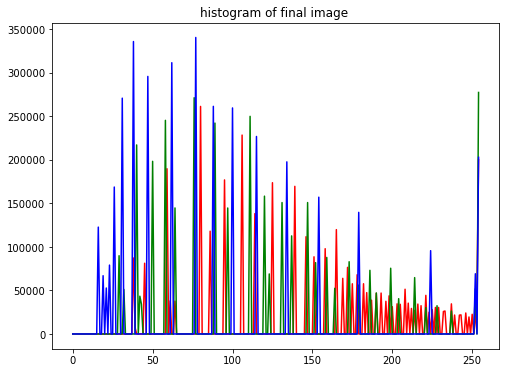

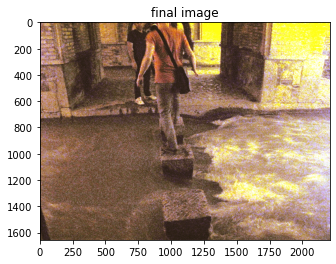

In [8]:
# ----------------------------------------------
imm = cv2.imread("dark.jpg")
im1 = np.array(imm)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im1 = np.array(im1)

immm = cv2.imread("pink.jpg")
im2 = np.array(immm)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)


[c1, c2, c3] = im1.shape
size = int(c1)*int(c2)

im3 = im1.copy()


histogram_equalizer(im3, size)


[c1, c2, c3] = hist_specifier(im1, im2)

apply_changes(im3, c1, c2, c3)

h_r_sp, bins_rs = np.histogram(im3[:, :, 0], range(0, 256))
h_g_sp, bins_gs = np.histogram(im3[:, :, 1], range(0, 256))
h_b_sp, bins_bs = np.histogram(im3[:, :, 2], range(0, 256))


plt.figure(figsize=(8, 6))
plt.plot(h_r_sp, color='red')
plt.plot(h_g_sp, color='green')
plt.plot(h_b_sp, color='blue')
plt.title('histogram of final image ')
plt.savefig('res10.png')
plt.show()


plt.imshow(im3)
plt.title('final image')

plt.show()

data = im.fromarray(np.uint8(im3))
data.save('res11.jpg')  # save the result

im4 = cv2.imread("res11.jpg")
im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)
im4 = np.array(im4)



